In [ ]:
import pandas as pd

path = "/content/exoplanets.csv"

df = pd.read_csv(path)

print("Dimensões da base:", df.shape)
print("\nColunas disponíveis:\n", df.columns.tolist()[:30])
df.head(5)


Dimensões da base: (5779, 682)

Colunas disponíveis:
 ['objectid', 'pl_name', 'pl_letter', 'hostid', 'hostname', 'hd_name', 'hip_name', 'tic_id', 'disc_pubdate', 'disc_year', 'disc_method', 'discoverymethod', 'disc_locale', 'disc_facility', 'disc_instrument', 'disc_telescope', 'disc_refname', 'ra', 'raerr1', 'raerr2', 'rasymerr', 'rastr', 'ra_solnid', 'ra_reflink', 'dec', 'decerr1', 'decerr2', 'decsymerr', 'decstr', 'dec_solnid']


,objectid,pl_name,pl_letter,hostid,hostname,hd_name,hip_name,tic_id,disc_pubdate,disc_year,...,cb_flag,pl_angsep,pl_angseperr1,pl_angseperr2,pl_angseplim,pl_angsepformat,pl_angsepstr,pl_angsepsymerr,pl_angsep_reflink,pl_ndispec
0,3.3458,Kepler-334 d,d,2.491000,Kepler-334,NaN,NaN,TIC 158394479,2014-03,2014,...,0.0,0.3940,NaN,NaN,0.0,NaN,0.3940,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0.0
1,3.9930,Kepler-251 d,d,2.526326,Kepler-251,NaN,NaN,TIC 272489533,2014-03,2014,...,0.0,0.1970,NaN,NaN,0.0,NaN,0.1970,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0.0
2,3.7480,Kepler-729 b,b,2.547053,Kepler-729,NaN,NaN,TIC 158269049,2016-05,2016,...,0.0,0.0225,NaN,NaN,0.0,NaN,0.0225,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0.0
3,3.4260,Kepler-687 b,b,2.435860,Kepler-687,NaN,NaN,TIC 121988890,2016-05,2016,...,0.0,0.2090,NaN,NaN,0.0,NaN,0.2090,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0.0
4,3.1090,Kepler-119 b,b,2.499389,Kepler-119,NaN,NaN,TIC 271964647,2014-03,2014,...,0.0,0.0499,NaN,NaN,0.0,NaN,0.0499,NaN,<a refstr=CALCULATED_VALUE href=/docs/pscp_cal...,0.0


Registros após limpeza: 5735


,pl_name,pl_bmasse,pl_rade,pl_dens,pl_eqt,pl_insol,st_met
0,Kepler-334 d,2.570000,1.41,5.04,656.0,39.475,-0.012
1,Kepler-251 d,8.100000,2.77,2.09,536.0,17.477,-0.060
2,Kepler-729 b,12.500000,3.58,1.50,1273.0,1089.549,-0.050
3,Kepler-687 b,12.200000,3.52,1.54,518.0,15.648,-0.040
4,Kepler-119 b,12.600000,3.60,1.48,1213.0,745.285,0.010
5,Kepler-1115 b,3.530000,1.70,3.95,1381.0,516.101,-0.510
6,Kepler-1073 b,5.900000,2.30,2.66,905.0,128.550,0.000
7,HD 16175 b,1875.187601,12.80,4.91,NaN,NaN,0.300
8,Kepler-405 b,4.980000,2.08,3.04,785.0,55.623,-0.060
10,Kepler-899 b,7.650000,2.68,2.18,640.0,62.198,-0.060


,pl_bmasse,pl_rade,pl_dens,pl_eqt,pl_insol,st_met
count,5735.000000,5735.000000,5676.000000,4322.000000,4061.000000,5267.000000
mean,385.220640,5.730096,4.927608,916.699944,427.068112,0.014521
std,1105.749105,5.306582,35.328789,467.010102,1344.540743,0.188377
min,0.020000,0.309800,0.005100,34.000000,0.000300,-1.000000
25%,4.073303,1.790000,1.300000,569.000000,23.918000,-0.080000
50%,8.960000,2.802245,2.580000,821.500000,99.240000,0.020000
75%,176.076937,11.770000,4.610000,1166.000000,382.328000,0.130000
max,9344.155166,77.342100,2000.000000,4050.000000,44900.000000,0.600000


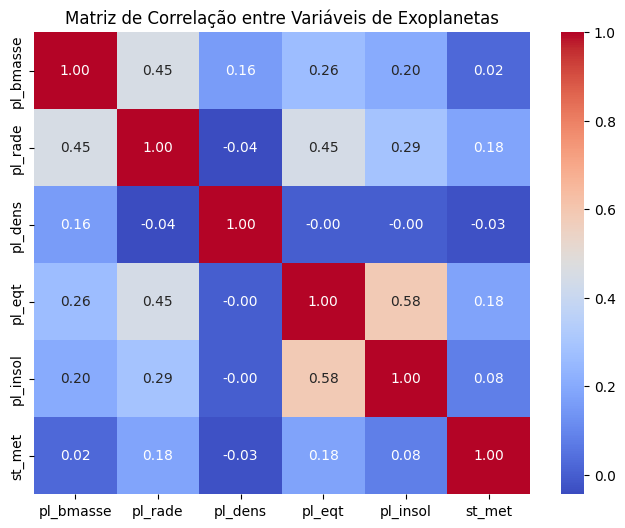

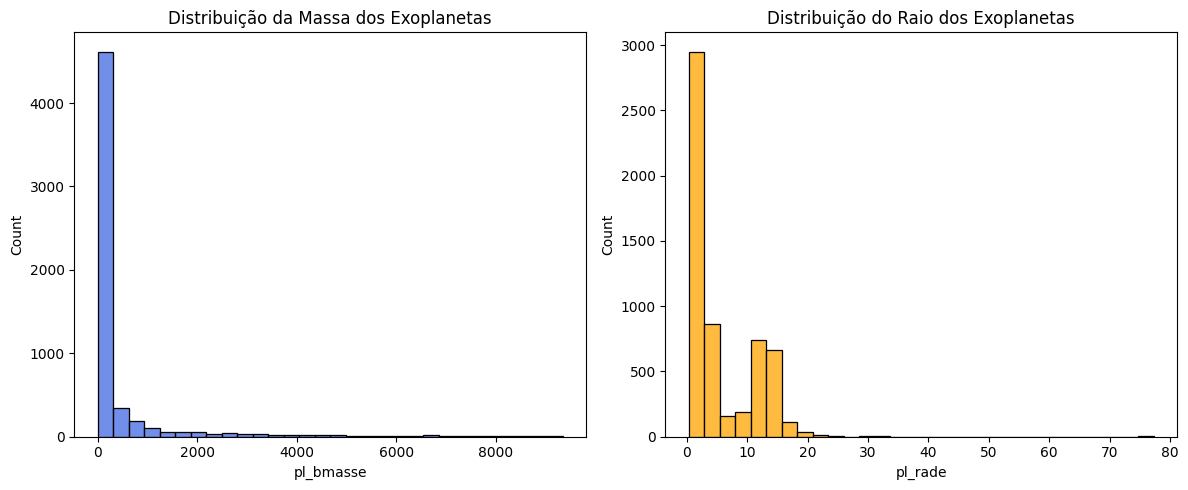

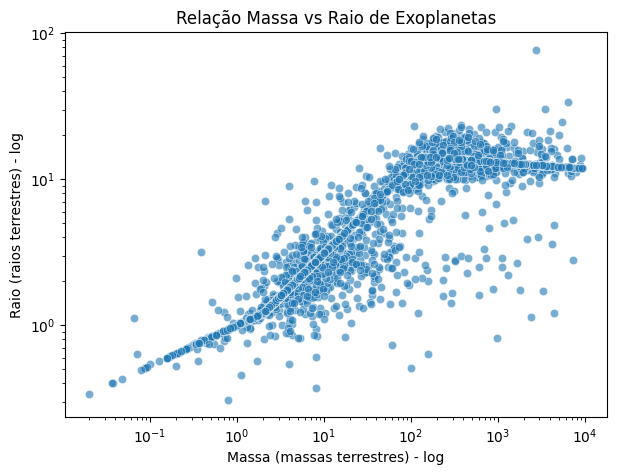

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['pl_name', 'pl_bmasse', 'pl_rade', 'pl_dens', 'pl_eqt', 'pl_insol', 'st_met']
df_reduced = df[cols].copy()

df_reduced = df_reduced.dropna(subset=['pl_bmasse', 'pl_rade'])

print("Registros após limpeza:", df_reduced.shape[0])
display(df_reduced.head(10))

display(df_reduced.describe())

plt.figure(figsize=(8, 6))
sns.heatmap(df_reduced.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação entre Variáveis de Exoplanetas")
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df_reduced['pl_bmasse'], bins=30, ax=axes[0], color='royalblue')
axes[0].set_title("Distribuição da Massa dos Exoplanetas")
sns.histplot(df_reduced['pl_rade'], bins=30, ax=axes[1], color='orange')
axes[1].set_title("Distribuição do Raio dos Exoplanetas")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7,5))
sns.scatterplot(x='pl_bmasse', y='pl_rade', data=df_reduced, alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Massa (massas terrestres) - log")
plt.ylabel("Raio (raios terrestres) - log")
plt.title("Relação Massa vs Raio de Exoplanetas")
plt.show()


In [ ]:
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
df_exo = pd.read_csv('/content/exoplanets.csv')

print(df_exo.shape)

(6028, 682)


In [ ]:
df_model = df_exo[['pl_bmasse', 'pl_rade', 'pl_eqt', 'st_met']].dropna()

df_model['log_mass'] = np.log10(df_model['pl_bmasse'])
df_model['log_radius'] = np.log10(df_model['pl_rade'])

df_model.head()


,pl_bmasse,pl_rade,pl_eqt,st_met,log_mass,log_radius
0,2.57,1.41,656.0,-0.012,0.409933,0.149219
1,8.10,2.77,536.0,-0.060,0.908485,0.442480
2,12.50,3.58,1273.0,-0.050,1.096910,0.553883
3,12.20,3.52,518.0,-0.040,1.086360,0.546543
4,12.60,3.60,1213.0,0.010,1.100371,0.556303


In [ ]:
X = sm.add_constant(df_model['log_mass'])
y = df_model['log_radius']

model_simple = sm.OLS(y, X).fit()
print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:             log_radius   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 2.156e+04
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:39:56   Log-Likelihood:                 2059.1
No. Observations:                4343   AIC:                            -4114.
Df Residuals:                    4341   BIC:                            -4101.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0503      0.004     13.649      0.0

log(raio) ~ log(massa) + temperatura + metalicidade

In [ ]:
X2 = df_model[['log_mass', 'pl_eqt', 'st_met']]
X2 = sm.add_constant(X2)
y = df_model['log_radius']

model_full = sm.OLS(y, X2).fit()
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:             log_radius   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     7258.
Date:                Mon, 20 Oct 2025   Prob (F-statistic):               0.00
Time:                        22:39:56   Log-Likelihood:                 2077.9
No. Observations:                4343   AIC:                            -4148.
Df Residuals:                    4339   BIC:                            -4122.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.005      6.991      0.0

In [ ]:
X = df_model[['log_mass', 'pl_eqt', 'st_met']]
y = df_model['log_radius']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("R² (teste):", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² (teste): 0.811284268787336
RMSE: 0.15905083910172657


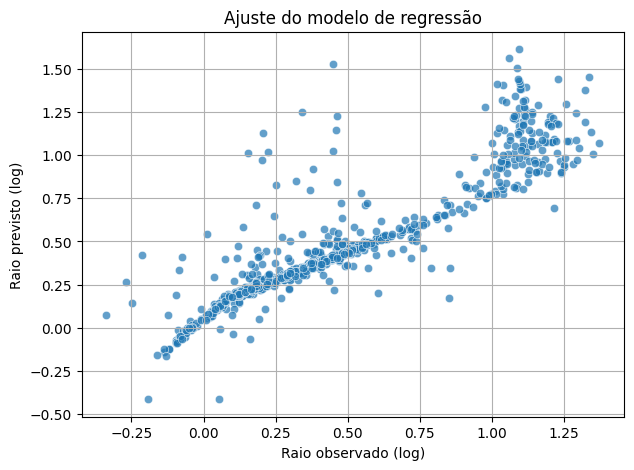

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Raio observado (log)")
plt.ylabel("Raio previsto (log)")
plt.title("Ajuste do modelo de regressão")
plt.grid(True)
plt.show()


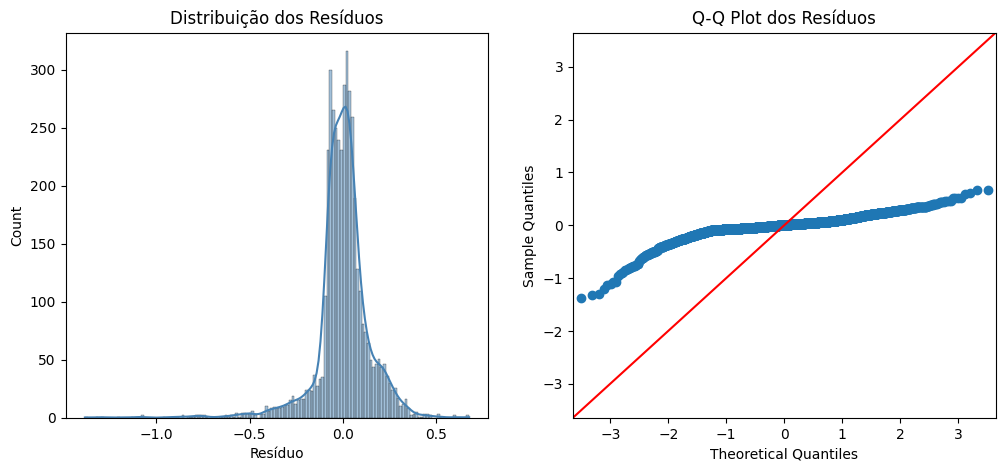

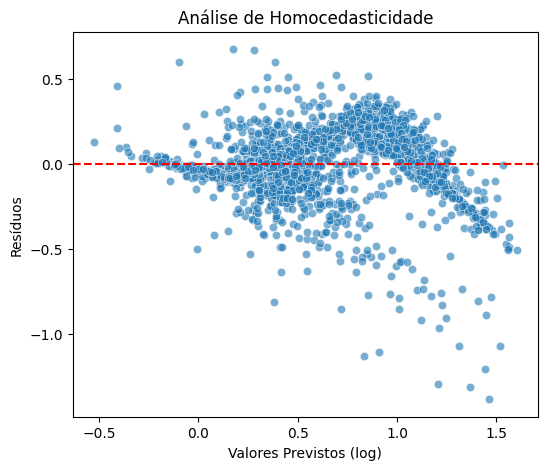

   Variável       VIF
0     const  5.673392
1  log_mass  1.142633
2    pl_eqt  1.106245
3    st_met  1.081124

Teste de Shapiro-Wilk (Normalidade):
Estatística = 0.845, p-valor = 0.00000

Durbin-Watson = 1.950


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_model[['log_mass', 'pl_eqt', 'st_met']]
y = df_model['log_radius']

X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

residuos = modelo.resid
preditos = modelo.fittedvalues

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(residuos, kde=True, ax=ax[0], color='steelblue')
ax[0].set_title("Distribuição dos Resíduos")
ax[0].set_xlabel("Resíduo")

sm.qqplot(residuos, line='45', ax=ax[1])
ax[1].set_title("Q-Q Plot dos Resíduos")

plt.show()

plt.figure(figsize=(6,5))
sns.scatterplot(x=preditos, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores Previstos (log)")
plt.ylabel("Resíduos")
plt.title("Análise de Homocedasticidade")
plt.show()

vif_data = pd.DataFrame()
vif_data["Variável"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]
print(vif_data)

from scipy import stats

shapiro_test = stats.shapiro(residuos[:5000])
print("\nTeste de Shapiro-Wilk (Normalidade):")
print(f"Estatística = {shapiro_test[0]:.3f}, p-valor = {shapiro_test[1]:.5f}")

dw = sm.stats.stattools.durbin_watson(residuos)
print(f"\nDurbin-Watson = {dw:.3f}")


--- 1. Análise de Normalidade dos Resíduos ---


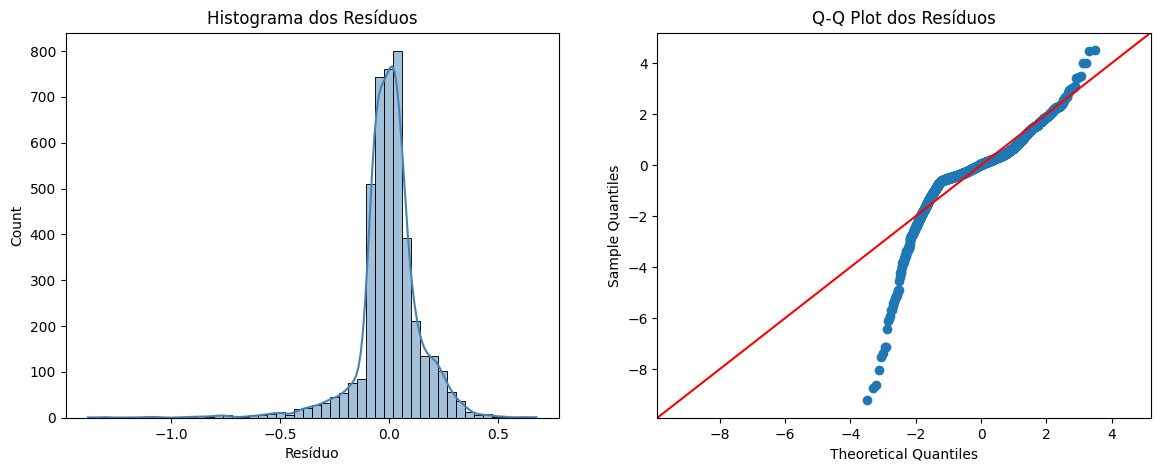


Teste de Shapiro-Wilk (em amostra de 4343):
Estatística = 0.8453, p-valor = 4.05712e-54
Resultado: Os resíduos (na amostra) NÃO parecem seguir uma distribuição normal (p < 0.05).

--- 2. Análise de Homocedasticidade (Variância dos Erros) ---


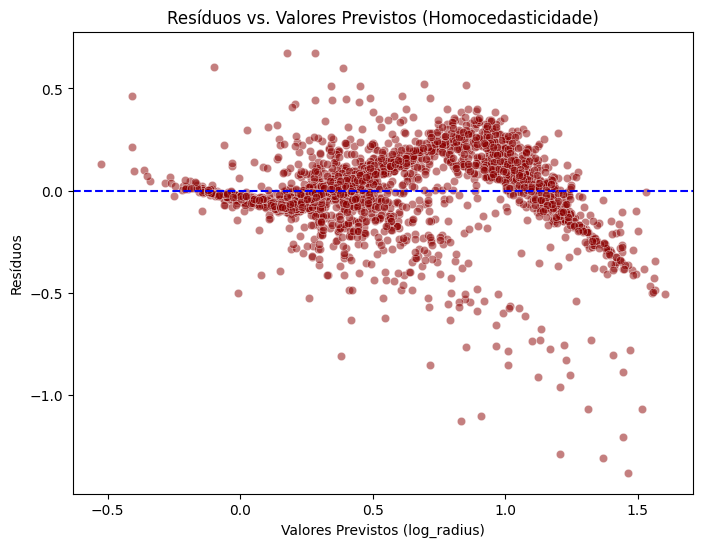


Teste de Breusch-Pagan (Homocedasticidade):
{'LM Statistic': np.float64(381.4003141744592), 'LM-Test p-value': np.float64(2.3644977385629416e-82), 'F-Statistic': np.float64(139.24475754277893), 'F-Test p-value': np.float64(3.8792529330438465e-86)}
Resultado: Há evidência de Heterocedasticidade (p < 0.05). A variância não é constante.

--- 3. Análise de Independência dos Resíduos ---
Teste Durbin-Watson = 1.950
Resultado: Não há evidência de autocorrelação (ideal).

--- 4. Análise de Multicolinearidade (VIF) ---
   Variável       VIF
0  log_mass  2.644564
1    pl_eqt  2.576307
2    st_met  1.054663

Resultado: Não há multicolinearidade preocupante (todos VIF < 5).


In [ ]:
from scipy import stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

X = df_model[['log_mass', 'pl_eqt', 'st_met']]
y = df_model['log_radius']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()

residuos = modelo.resid
preditos = modelo.fittedvalues

print("--- 1. Análise de Normalidade dos Resíduos ---")

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(residuos, kde=True, ax=ax[0], color='steelblue', bins=50)
ax[0].set_title("Histograma dos Resíduos")
ax[0].set_xlabel("Resíduo")

sm.qqplot(residuos, line='45', fit=True, ax=ax[1])
ax[1].set_title("Q-Q Plot dos Resíduos")
plt.show()

amostra_residuos = residuos.sample(min(len(residuos), 5000), random_state=42)
shapiro_test = stats.shapiro(amostra_residuos)
print(f"\nTeste de Shapiro-Wilk (em amostra de {len(amostra_residuos)}):")
print(f"Estatística = {shapiro_test.statistic:.4f}, p-valor = {shapiro_test.pvalue:.5e}")
if shapiro_test.pvalue < 0.05:
    print("Resultado: Os resíduos (na amostra) NÃO parecem seguir uma distribuição normal (p < 0.05).")
else:
    print("Resultado: Os resíduos (na amostra) parecem seguir uma distribuição normal (p > 0.05).")


print("\n--- 2. Análise de Homocedasticidade (Variância dos Erros) ---")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=preditos, y=residuos, alpha=0.5, color='darkred')
plt.axhline(0, color='blue', linestyle='--')
plt.xlabel("Valores Previstos (log_radius)")
plt.ylabel("Resíduos")
plt.title("Resíduos vs. Valores Previstos (Homocedasticidade)")
plt.show()

bp_test = sms.het_breuschpagan(residuos, modelo.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
bp_resultado = dict(lzip(labels, bp_test))
print(f"\nTeste de Breusch-Pagan (Homocedasticidade):")
print(bp_resultado)
if bp_resultado['LM-Test p-value'] < 0.05:
    print("Resultado: Há evidência de Heterocedasticidade (p < 0.05). A variância não é constante.")
else:
    print("Resultado: Não há evidência de Heterocedasticidade (p > 0.05). A variância é constante.")


print("\n--- 3. Análise de Independência dos Resíduos ---")
dw = sm.stats.stattools.durbin_watson(residuos)
print(f"Teste Durbin-Watson = {dw:.3f}")
if 1.5 < dw < 2.5:
    print("Resultado: Não há evidência de autocorrelação (ideal).")
else:
    print("Resultado: Há indícios de autocorrelação (valor longe de 2.0).")

print("\n--- 4. Análise de Multicolinearidade (VIF) ---")

X_vif = X.drop('const', axis=1)
vif_data = pd.DataFrame()
vif_data["Variável"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i)
                   for i in range(X_vif.shape[1])]
print(vif_data)
if (vif_data['VIF'] > 5).any():
    print("\nResultado: Há indício de multicolinearidade (VIF > 5 para alguma variável).")
else:
    print("\nResultado: Não há multicolinearidade preocupante (todos VIF < 5).")

In [ ]:
X = df_model[['log_mass', 'pl_eqt', 'st_met']]
y = df_model['log_radius']
X = sm.add_constant(X)

modelo_ols = sm.OLS(y, X).fit()

modelo_robusto = modelo_ols.get_robustcov_results(cov_type='HC1')

print("--- Sumário do Modelo OLS (Original - para comparação) ---")
print(modelo_ols.summary().tables[1])

print("\n\n--- Sumário do Modelo Otimizado (com Erros Padrão Robustos 'HC1') ---")
print(modelo_robusto.summary().tables[1])

--- Sumário do Modelo OLS (Original - para comparação) ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.005      6.991      0.000       0.027       0.049
log_mass       0.3846      0.003    135.773      0.000       0.379       0.390
pl_eqt      1.987e-05   5.23e-06      3.796      0.000    9.61e-06    3.01e-05
st_met         0.0591      0.014      4.372      0.000       0.033       0.086


--- Sumário do Modelo Otimizado (com Erros Padrão Robustos 'HC1') ---
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0379      0.005      6.967      0.000       0.027       0.049
log_mass       0.3846      0.005     81.783      0.000       0.375       0.394
pl_eqt      1.987e-05   5.75e-06      3.457      0.001     8.6e-06    3.11e-05


Resultados do Score (Previsões vs. Reais):


,log_radius,log_radius_predito,erro_previsao
0,0.149219,0.207888,-0.058669
1,0.442480,0.394403,0.048076
2,0.553883,0.482102,0.071781
3,0.546543,0.463636,0.082907
4,0.556303,0.485788,0.070515
5,0.230449,0.245869,-0.015420
6,0.361728,0.352349,0.009379
8,0.318063,0.318104,-0.000041
10,0.428135,0.386923,0.041212
11,0.365488,0.351868,0.013620




Resultados do Score (Convertidos para Raios Terrestres):


,pl_rade_real,pl_rade_predito
0,1.41,1.613944
1,2.77,2.479724
2,3.58,3.034607
3,3.52,2.908279
4,3.60,3.060467
5,1.70,1.761445
6,2.30,2.250863
8,2.08,2.080197
10,2.68,2.437377
11,2.32,2.248370


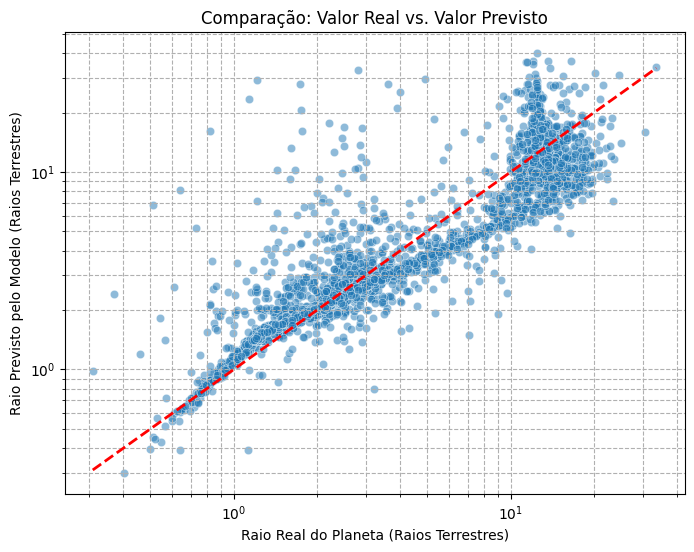

In [ ]:
from sklearn.model_selection import train_test_split

X = df_model[['log_mass', 'pl_eqt', 'st_met']]
y = df_model['log_radius']

lr_final = LinearRegression()
lr_final.fit(X, y)

df_model['log_radius_predito'] = lr_final.predict(X)

df_model['erro_previsao'] = df_model['log_radius'] - df_model['log_radius_predito']

print("Resultados do Score (Previsões vs. Reais):")

display(df_model[['log_radius', 'log_radius_predito', 'erro_previsao']].head(10))

df_model['pl_rade_real'] = np.power(10, df_model['log_radius'])
df_model['pl_rade_predito'] = np.power(10, df_model['log_radius_predito'])

print("\n\nResultados do Score (Convertidos para Raios Terrestres):")
display(df_model[['pl_rade_real', 'pl_rade_predito']].head(10))

plt.figure(figsize=(8, 6))
sns.scatterplot(x='pl_rade_real', y='pl_rade_predito', data=df_model, alpha=0.5)
plt.plot([df_model['pl_rade_real'].min(), df_model['pl_rade_real'].max()],
         [df_model['pl_rade_real'].min(), df_model['pl_rade_real'].max()],
         color='red', linestyle='--', lw=2)
plt.xlabel("Raio Real do Planeta (Raios Terrestres)")
plt.ylabel("Raio Previsto pelo Modelo (Raios Terrestres)")
plt.title("Comparação: Valor Real vs. Valor Previsto")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()